<a href="https://colab.research.google.com/github/xeltgit/thebattle_capstone/blob/master/Final_battle_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class Location:
  def get_CityName(self):
    return self.__CityName
  def set_CityName(self, CityName):
    self.__CityName = CityName


  def get_Name(self):
    return self.__CityName
  
  def set_Name(self, CityName):
    self.__CityName = CityName
 
  def get_Address(self):
    return self.__Address
  
  def set_Address(self, Address):
    self.__Address = Address


class CityData:
  
  def get_CityName(self):
    return self.__CityName
  def set_CityName(self, CityName):
    self.__CityName = CityName

  def get_InverseCostOfLiving(self):
    return self._InverseCostOfLiving
  def set_InverseCostOfLiving(self, Name):
    self._InverseCostOfLiving = InverseCostOfLiving

  def get_Lat(self):
    return self._Lat
  def set_Lat(self, Lat):
    self._Lat = Lat

  def get_Long(self):
    return self._Long
  def set_Lat(self, Long):
    self._Long = Long





In [2]:
# for testing 
import pandas as pd # library for data analysis

obj = CityData()
obj.CityName= "Name"
obj.InverseCostOfLiving= 1/12

loc = Location()
loc.CityName= "CityName"
loc.Name="Name"
loc.Address ="Address"

l = []
c = []
l.append(loc)
c.append(obj)

 #convert list of objects to pandas dataframe  
aa = pd.DataFrame([vars(s) for s in l])
bb = pd.DataFrame([vars(s) for s in c])
cc= aa.join(bb.set_index('CityName'), on='CityName')


#cc.reset_index()
print(cc)




   CityName  Name  Address  InverseCostOfLiving
0  CityName  Name  Address                  NaN


In [0]:
from lxml import html
import requests

page_capital_cities_cost_of_living = requests.get('https://www.expatistan.com/cost-of-living/index/europe')

tree_cost_of_living = html.fromstring(page_capital_cities_cost_of_living.content)

capitalCitiesCostOfLiving = []  
tmpCityNamestring = "."


In [0]:
# get all costs of living from website 
try:
  row  = 1
  while len(tmpCityNamestring)> 0:
    
    tmpCityNamestring = tree_cost_of_living.xpath("//table[@class='city-index']//tr["+ str(row) + "]/td[@class='city-name']//text()")
    tmpCityPriceIndex =  tree_cost_of_living.xpath("//table[@class='city-index']//tr["+ str(row) + "]/td[@class='price-index']//text()") 
    if (len(tmpCityNamestring)>0): 
      firstElementName = tmpCityNamestring[0]
      firstElementPriceIndex = int(tmpCityPriceIndex[0])

      #split ie ncessary because string is not clean and extrapolation info is necessary
      tmpCityName= firstElementName.split(" ")[0]
      if (tmpCityName.find("(")):
        tmpCityName= tmpCityName.split("(")[0]

      obj = CityData()
      obj.CityName= tmpCityName
      obj.InverseCostOfLiving= 1.0 / firstElementPriceIndex
      capitalCitiesCostOfLiving.append(obj)

    row=row+1
except Exception:
  print("error while reading.. " + Exception)





In [5]:

for x in range(len(capitalCitiesCostOfLiving)):
  print(capitalCitiesCostOfLiving[x].CityName + " - " + str(capitalCitiesCostOfLiving[x].InverseCostOfLiving)) 

Geneva - 0.0036231884057971015
Zurich - 0.0038022813688212928
Basel - 0.003968253968253968
Lugano - 0.004291845493562232
London - 0.004347826086956522
Dublin - 0.0045871559633027525
Oslo - 0.004694835680751174
Copenhagen - 0.004761904761904762
Reykjavik - 0.0049504950495049506
Amsterdam - 0.00510204081632653
Paris - 0.005128205128205128
Luxembourg - 0.005434782608695652
Stockholm - 0.005494505494505495
Frankfurt - 0.00558659217877095
Helsinki - 0.005681818181818182
Rotterdam - 0.005714285714285714
The - 0.005714285714285714
Oxford - 0.005747126436781609
Munich - 0.005747126436781609
Bristol - 0.005917159763313609
Hamburg - 0.005952380952380952
Lyon - 0.006024096385542169
Brighton - 0.006024096385542169
Cork - 0.006060606060606061
Cologne - 0.006060606060606061
Eindhoven - 0.006172839506172839
Manchester - 0.006211180124223602
Milan - 0.00625
Stuttgart - 0.006329113924050633
Brussels - 0.00641025641025641
Rome - 0.0064516129032258064
Gothenburg - 0.006493506493506494
Aberdeen - 0.006493

In [6]:
CLIENT_ID = 'LCZCSFO1BGHZ4R5D0SQI3NSVBYCTFD3D51LTA2FSC1G5W0FV' # your Foursquare ID
CLIENT_SECRET = 'A2CIXC3SJ4SRVFNPPSL0S05VR4EJF2WURNVNIOGC02QZOMKT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LCZCSFO1BGHZ4R5D0SQI3NSVBYCTFD3D51LTA2FSC1G5W0FV
CLIENT_SECRET:A2CIXC3SJ4SRVFNPPSL0S05VR4EJF2WURNVNIOGC02QZOMKT


In [8]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings('ignore')  #ignore json_normalize warning for instance
import pandas as pd # library for data analysis


#address = 'London'
geolocator = Nominatim(user_agent="foursquare_agent")


capitalCitiesVenues = []
for x in range(len(capitalCitiesCostOfLiving)):
#for x in range(1):
  location = geolocator.geocode(capitalCitiesCostOfLiving[x].CityName)
  if location is None:
    continue
  
  latitude = location.latitude
  longitude = location.longitude
  capitalCitiesCostOfLiving[x].Lat = latitude
  capitalCitiesCostOfLiving[x].Long = longitude

  #print(capitalCitiesCostOfLiving[x].CityName, latitude, longitude)
  search_query = 'Italian'
  radius = 1000
  url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
  results = requests.get(url).json()
  venues = results['response']['venues']
  #location = results['response']['location']['address']
  
  for venue in venues:
    try:
      venueObj = Location()
      venueObj.CityName= capitalCitiesCostOfLiving[x].CityName
      
      name = (venue['name'])
      venueObj.Name= name
      location = venue['location']
      if location is not None:
        address= location['address']
        venueObj.Address= address
        print(name + "  =>    "  + address)

      capitalCitiesVenues.append(venueObj)



    except Exception:
      #print("" + Exception)
      continue
  
  #convert list of objects to pandas dataframe  
  costOfLiving = pd.DataFrame([vars(s) for s in capitalCitiesCostOfLiving])
  venues = pd.DataFrame([vars(s) for s in capitalCitiesVenues])
  cc= costOfLiving.join(venues.set_index('CityName'), on='CityName')
  #cc.reset_index()
  cc.insert(0,'RowNumber',cc.reset_index().index)
  #cc['RowNumber'] = cc.reset_index().index
  cc.reset_index()
  cc.set_index(['RowNumber'])
  citiesDataSet = (cc[["RowNumber","CityName","Name","Address","InverseCostOfLiving"]])

 


  




Italian Pub  =>    20 Boulevard Carl Vogt
Tradizione Italiana  =>    Gare Cornavin, Metro Shopping
Manu Il Gelato Italiano  =>    Rue de Pâquis 15
Manu Il Gelato Italiano  =>    Rue des Eaux-Vives 21
Punto Italiano  =>    Zähringerplatz
The Pasteria Italiana  =>    Universitätstrasse 15
Al Cortile Italiano  =>    Rebgasse 29
Consulato Italiano  =>    Via Ferruccio Pelli 16
Università della Svizzera italiana - campo  =>    via Buffi
Università della Svizzera italiana, Faculty of Informatics, Software Engineering Department  =>    Via Serafino Balestra 22
Scuola ILI di lingua e cultura italiana  =>    Via Basilea 22
SAPORI ITALIANI  =>    Via Maggio 1c
Comunità Ortodossa della Svizzera italiana  =>    Via Madonnetta
Procrea Centro Fertilità Svizzera Italiana SA  =>    via clemente maraini 8
USI Università della Svizzera italiana  =>    Via Giuseppe Buffi 13
Radiotelevisione svizzera di lingua italiana - RSI  =>    Via Guglielmo Canevascini
Conservatorio della Svizzera Italiana  =>    Via

In [0]:
import numpy as np
citiesDataSet = (cc[["RowNumber","CityName","Name","Address","InverseCostOfLiving","Lat","Long"]])
#filter=  citiesDataSet["CityName"]=="Geneva"
#citiesDataSet.where(filer, inplace t= True)
citiesDataSet = citiesDataSet[["CityName","InverseCostOfLiving","Lat","Long"]]#.drop_duplicates()
citiesDataSet['Venues_Number'] = citiesDataSet.groupby(['CityName']).CityName.transform(np.size)
new = citiesDataSet.drop_duplicates()
#new = new[["CityName","InverseCostOfLiving","Venues_Number"]]
cities = new["CityName"]
new = new[["InverseCostOfLiving","Venues_Number","Lat","Long"]]
newforkmeans = new[["InverseCostOfLiving","Venues_Number"]]
newforkmeans

lats = new["Lat"]
longs = new["Long"]


In [0]:
from sklearn.preprocessing import StandardScaler
#new = new.drop('CityName', axis=1)
newforkmeans.head()


X = newforkmeans.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
#cluster_dataset


In [12]:
from sklearn.cluster import KMeans 

num_clusters = 8

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels.max())

newforkmeans["CityName"] = cities
newforkmeans["Lat"] = lats
newforkmeans["Long"] = longs
newforkmeans["Scoring"] = labels
#newforkmeans= newforkmeans.insert(0,'CityName',cities)

# exlude lat long null 
newforkmeans= newforkmeans.dropna()

newforkmeans 



7


,InverseCostOfLiving,Venues_Number,CityName,Lat,Long,Scoring
0,0.003623,4,Geneva,46.201756,6.146601,3
1,0.003802,2,Zurich,47.372394,8.542333,0
2,0.003968,1,Basel,47.558108,7.587826,5
3,0.004292,10,Lugano,46.005010,8.952028,2
4,0.004348,24,London,51.507322,-0.127647,4
...,...,...,...,...,...,...
78,0.012500,8,Kiev,50.450034,30.524136,6
79,0.012500,1,Cluj-Napoca,46.769379,23.589954,5
80,0.013514,1,Iasi,47.161534,27.583614,5
81,0.013699,2,Yekaterinburg,56.839104,60.608250,0


In [13]:

def color_producer(scoring):
    if scoring > 6:
        return 'green'
    elif 4 <= scoring < 6:
        return 'yellow'
    elif 2 <= scoring < 4:
        return 'orange'
        
    else:
        return 'red'



import folium # map rendering library
location = geolocator.geocode('Europe')

# create map of Europe using latitude and longitude values
europe = folium.Map(location=[latitude, longitude], zoom_start=4)
for lat, long, cityName, scoring in zip(newforkmeans['Lat'], newforkmeans['Long'], newforkmeans['CityName'], newforkmeans["Scoring"]):
    label = '{}'.format(cityName)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=(10),
        popup=label,
        color=color_producer(scoring),
        fill=True,
        fill_color=color_producer(scoring),
        fill_opacity=0.7,
        parse_html=False).add_to(europe)  

europe



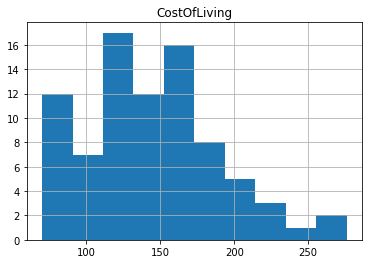

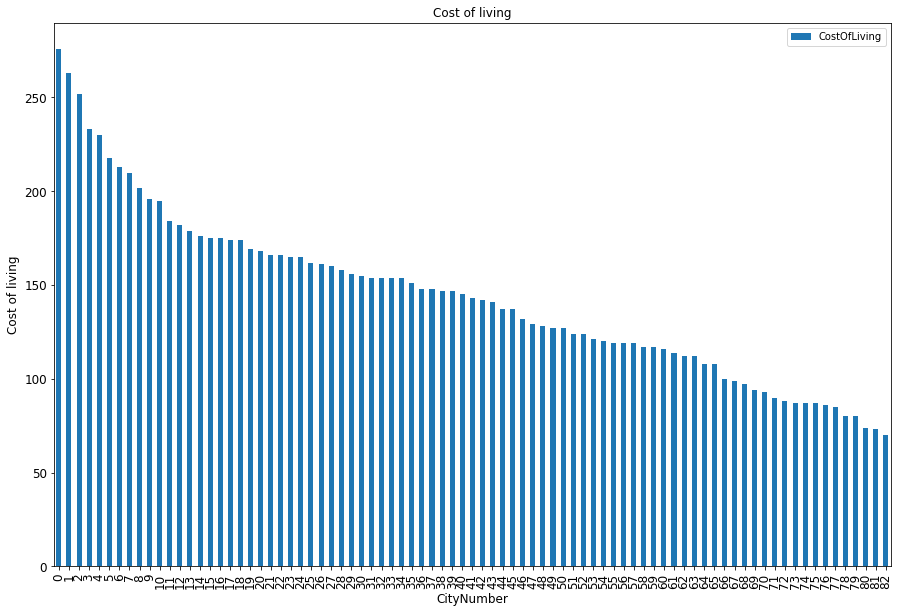

In [14]:
costOfLiving["CostOfLiving"] = 1/ costOfLiving["InverseCostOfLiving"]
costOfLivingHis= costOfLiving[["CityName","CostOfLiving"]]
costOfLivingHis.hist()


import matplotlib.pyplot as plt
ax = costOfLivingHis[['CityName','CostOfLiving']].plot(kind='bar', title ="Cost of living", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("CityNumber", fontsize=12)
ax.set_ylabel("Cost of living", fontsize=12)
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc36c551a58>]],
      dtype=object)

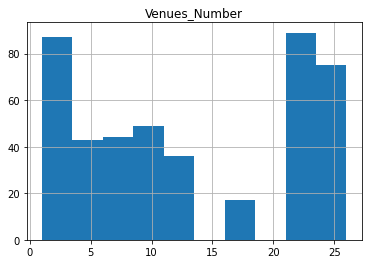

In [15]:
citiesDataSet

citiesDataSet[["CityName","Venues_Number"]].hist()

In [0]:

citiesDataSet

In [0]:
#filter=  citiesDataSet["CityName"]=='London'
#citiesHighestVenueNumber = citiesDataSet.where(filter, inplace= False)
#citiesHighestVenueNumber